In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='latin1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_in_euros    1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Média do tamanho das telas

In [7]:
df['Inches'].mean()

15.017191097467379

Maior valor no laptop

In [8]:
df['Price_in_euros'].max()

6099.0

Menor valor no laptop

In [9]:
df['Price_in_euros'].min()

174.0

Média de preço dos laptops

In [10]:
df['Price_in_euros'].mean()

1123.6869915579432

CPUs mais comum

In [11]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

Gpus mais comum

In [12]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [5]:
import matplotlib.pyplot as plt

Gerando gráfico de pontos com a companhia e o preço

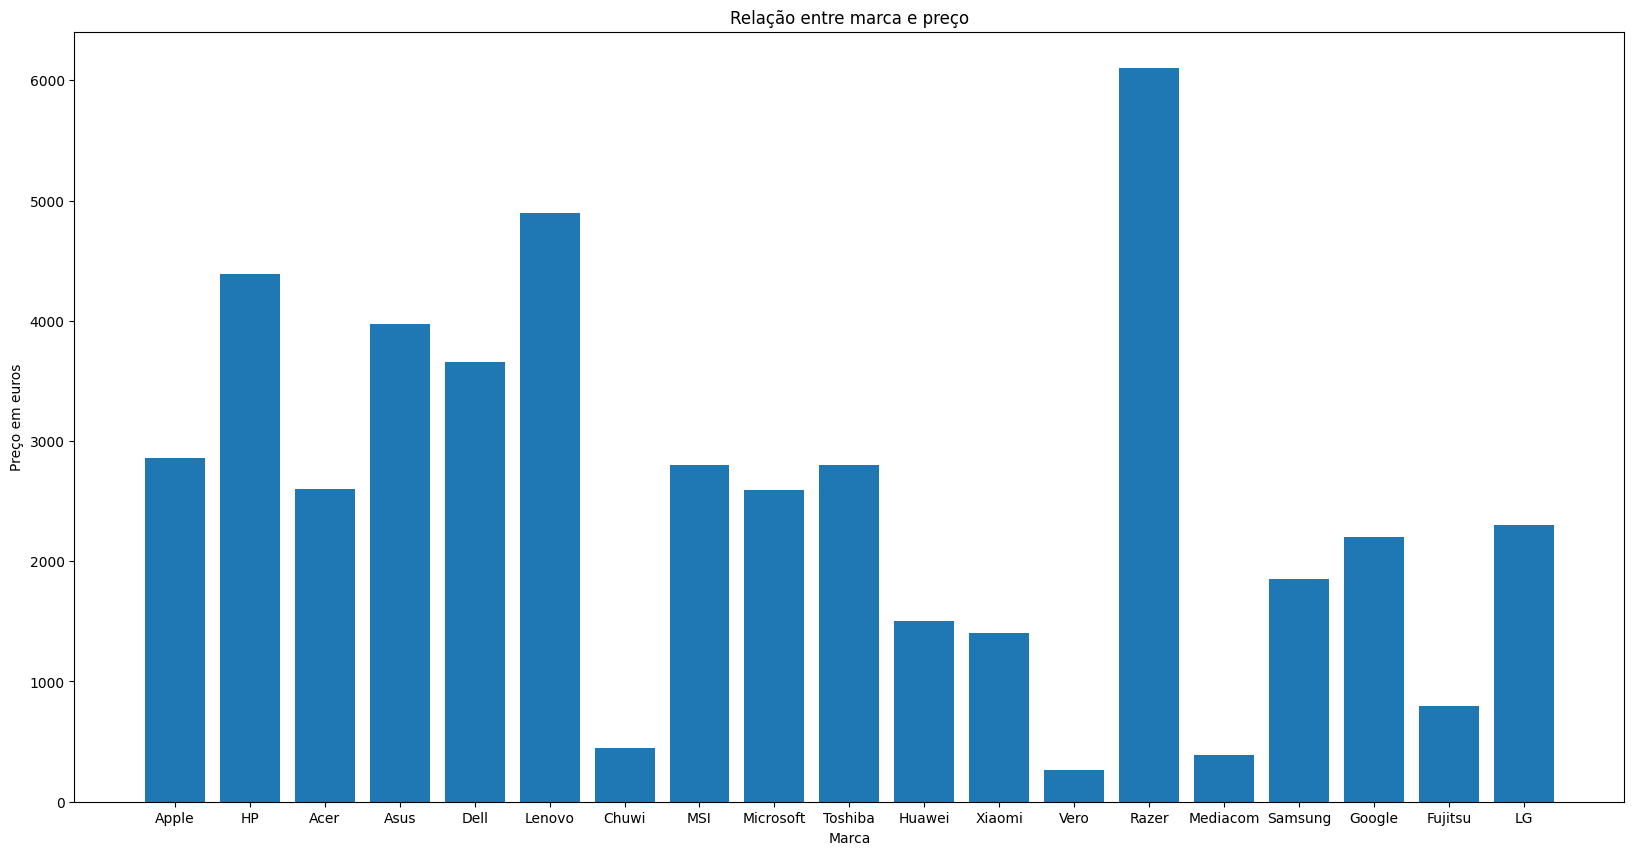

In [18]:
x = df['Company']
y = df['Price_in_euros']


plt.bar(x, y)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xlabel('Marca')
plt.ylabel('Preço em euros')
plt.title('Relação entre marca e preço')
plt.show()



Gráfico de barras agrupado por companhia e preço

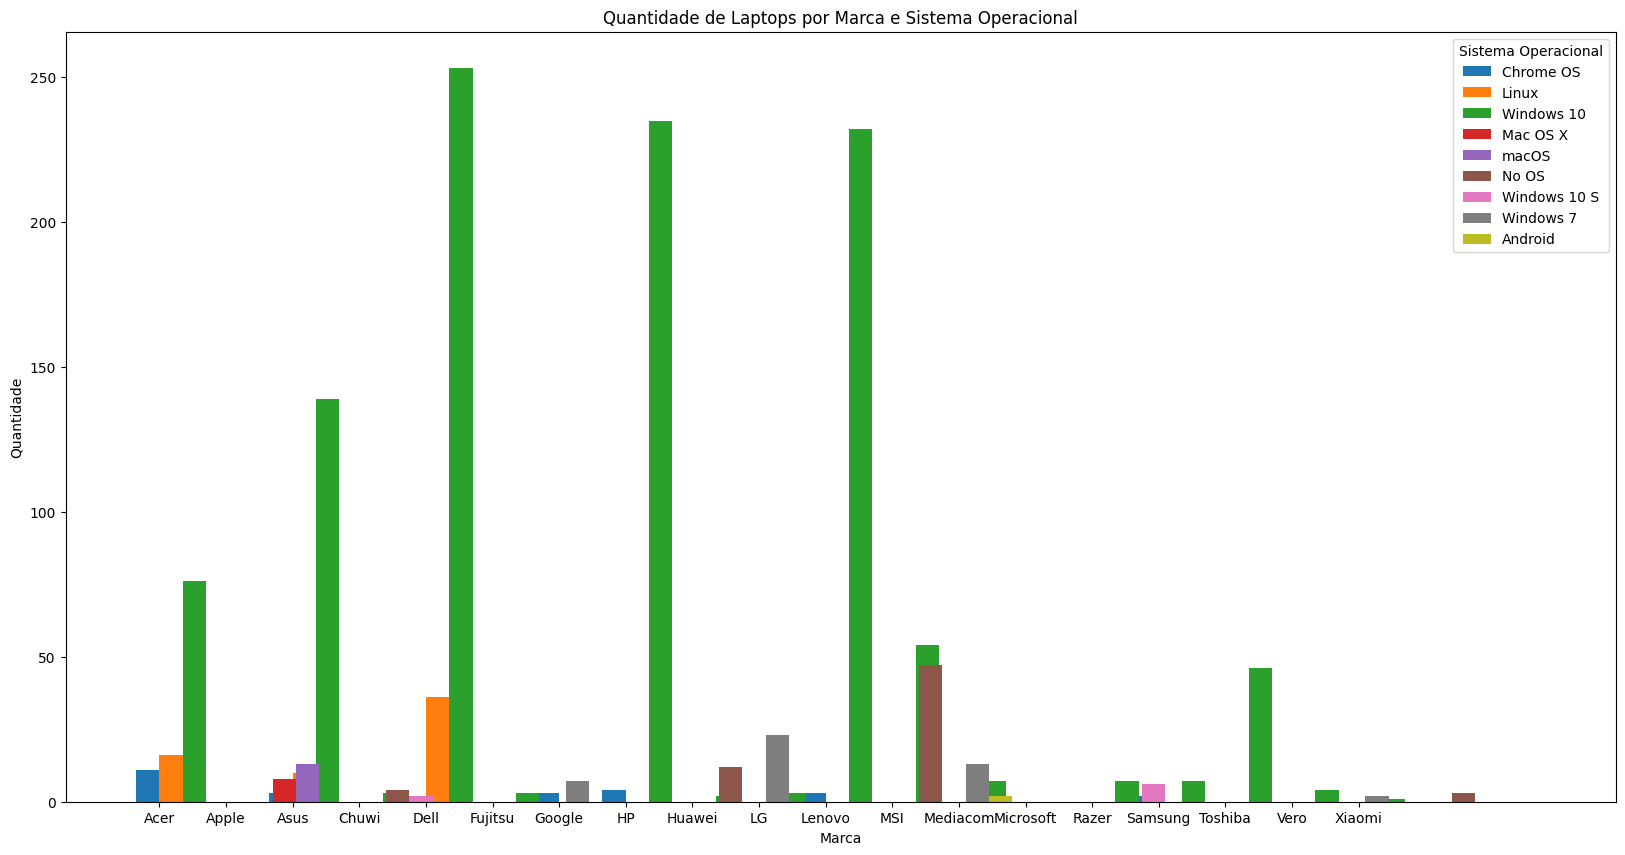

In [21]:

data = df.groupby(['Company', 'OpSys']).size().reset_index(name='count')

unique_marca = data['Company'].unique()
unique_os = data['OpSys'].unique()

barWidth = 0.35
x = np.arange(len(unique_marca))

fig, ax = plt.subplots(figsize=(20, 10))

# Crie uma tabela dinâmica com 'Company' como índice, 'OpSys' como colunas e 'count' como valores.
# Preencha os valores NaN (que ocorrem quando uma marca não tem um determinado sistema operacional) com zero.
data_pivot = data.pivot_table(index='Company', columns='OpSys', values='count', fill_value=0)

# Agora, para cada sistema operacional, você pode plotar uma barra para cada marca.
for i, os in enumerate(unique_os):
    os_data = data_pivot[os]
    ax.bar(x + (i * barWidth), os_data, width=barWidth, label=os)
    
ax.set_title('Quantidade de Laptops por Marca e Sistema Operacional')
ax.set_xlabel('Marca')
ax.set_ylabel('Quantidade')
ax.set_xticks(x + barWidth / 2)
ax.set_xticklabels(unique_marca)
ax.legend(title='Sistema Operacional')

# Exibindo o gráfico
plt.show()

Gráfico de pontos com relação entre as 5 CPUs mais comuns e o preço

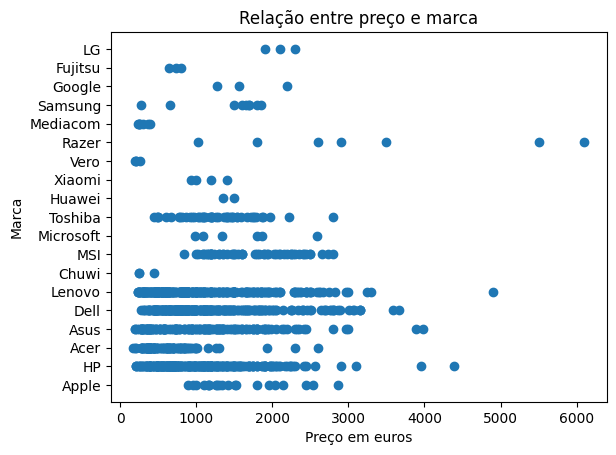

In [33]:
# Gráfico de pontos o menor preço para maior preço
x = df['Price_in_euros']
y = df['Company']

plt.scatter(x, y)
plt.xlabel('Preço em euros')
plt.ylabel('Marca')
plt.title('Relação entre preço e marca')
plt.show()


Gráfico de linhas com relação entre os preços medios dos laptopd por tamanho de tela

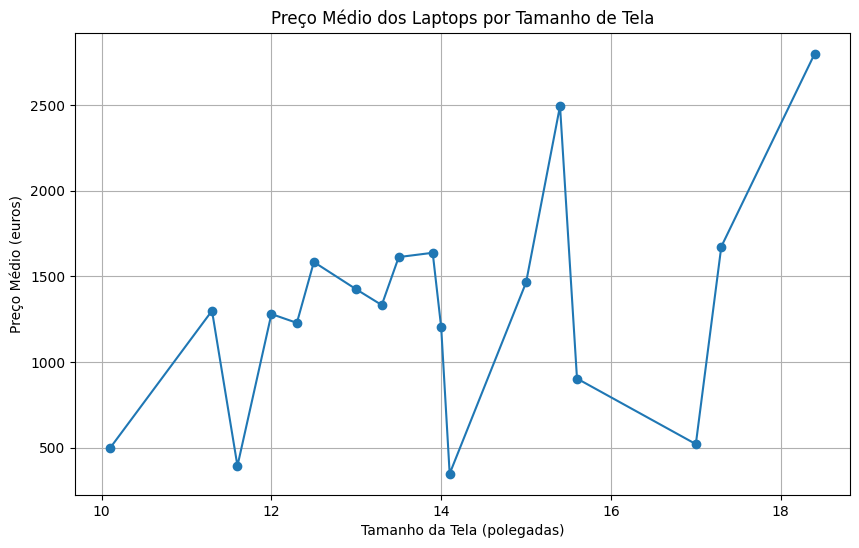

In [6]:
grouped_data = df.groupby('Inches')['Price_in_euros'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o')
plt.xlabel('Tamanho da Tela (polegadas)')
plt.ylabel('Preço Médio (euros)')
plt.title('Preço Médio dos Laptops por Tamanho de Tela')
plt.grid()
plt.show()


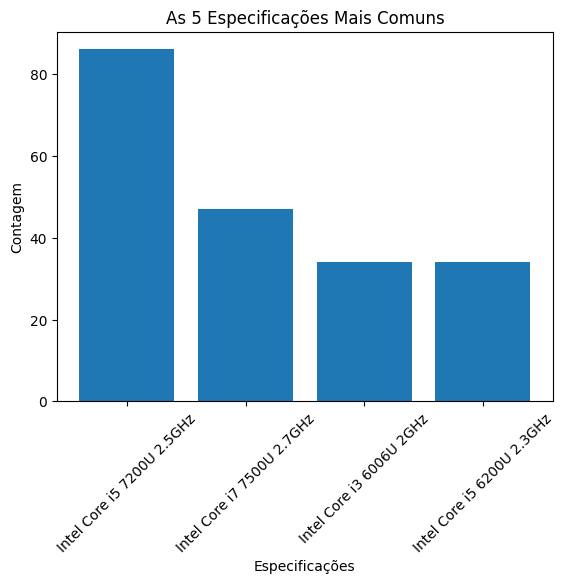

In [30]:
grouped_df = df.groupby(['Cpu', 'Gpu', 'Ram']).size().reset_index(name='Count')

sorted_df = grouped_df.sort_values(by='Count', ascending=False)

# Selecionar as 5 primeiras linhas (as 5 especificações mais comuns)
top_5_specifications = sorted_df.head(5)

plt.bar(top_5_specifications['Cpu'], top_5_specifications['Count'])
plt.xlabel('Especificações')
plt.ylabel('Contagem')
plt.title('As 5 Especificações Mais Comuns')
plt.xticks(rotation=45)
plt.show()